In [37]:
import os
import nibabel as nib
import numpy as np
from matplotlib import pyplot as plt
import math

In [105]:


def main(in_path):

    highest_value = 0

    max_values = list()

    image_list = list()

    
    #relevant_image_names = np.load("/Users/olath/Documents/GitHub/Master-thesis/Data_Experimentation/images_with_paths_file_0.npy",allow_pickle='TRUE').item()

    keys = list(relevant_image_names.keys())

    for subdir, dirs, files in os.walk(in_path):

        images_left = len(files)

        for file in files:
                           
                if (not file.startswith('._')): #and file[:-7] in keys:

                    img_nifti = nib.load(in_path+file)

                    img = np.array(img_nifti.dataobj)

                    max_value = img.max()

                    max_values.append(max_value)

                    if max_value > highest_value:

                        print(max_value)

                        image = file

                        highest_value = max_value

                        image_list.append(int(file[:-7]))

                    images_left -= 1


    return highest_value, image, max_values, image_list

test, test2, test3, test4 = main('/Volumes/Extreme SSD/ADNI_PROCESSED/')

print(test)
print(test2)

print(len(test4))
print(test4)
test4.sort()
print(test4)

20.095469
31.060394
85.71875
87.92281
103.85806
120.12935
128.73073
149.95464
149.95464
1644018.nii.gz
8
[70013, 15982, 25952, 40083, 49010, 1517526, 1472762, 1644018]
[15982, 25952, 40083, 49010, 70013, 1472762, 1517526, 1644018]


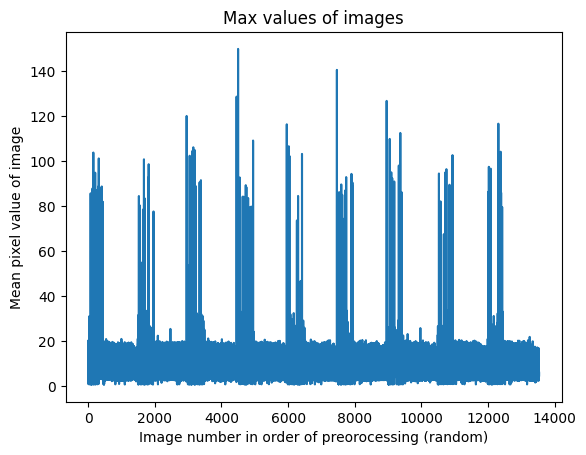

In [106]:
plt.plot(test3)

plt.title('Max values of images')
plt.xlabel('Image number in order of preorocessing (random)')
plt.ylabel('Mean pixel value of image')

plt.show()

3.5872872


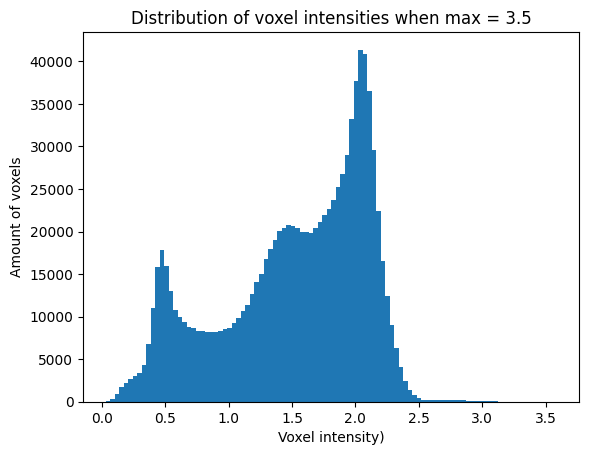

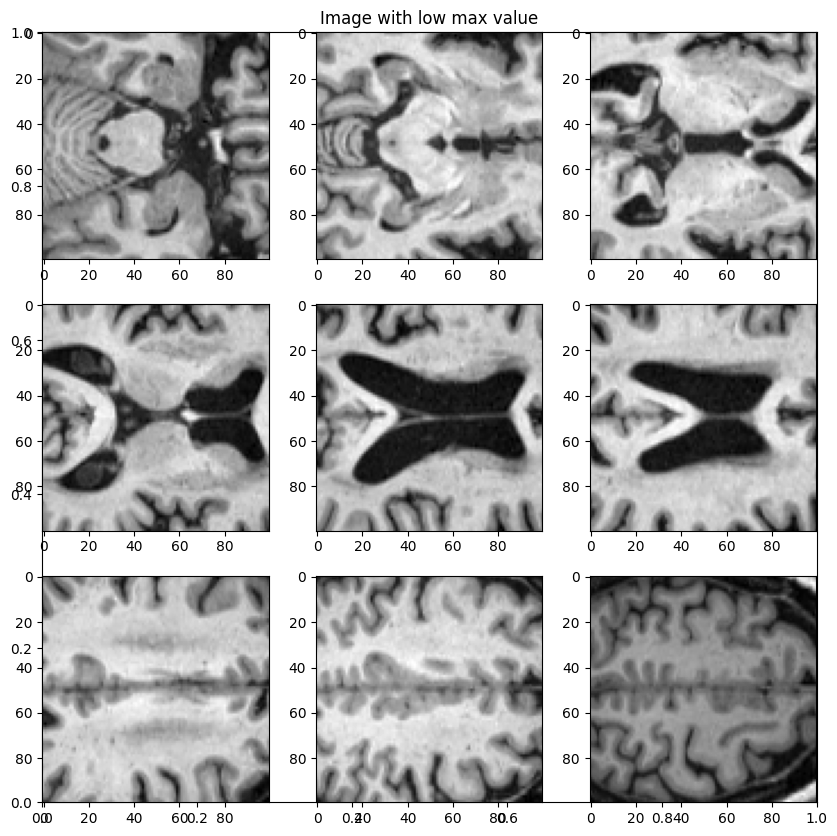

In [140]:
path = '/Volumes/Extreme SSD/ADNI_PROCESSED/377408.nii.gz'
#path = '/Volumes/Extreme SSD/ADNI_PROCESSED/1644018.nii.gz'

img_nifti = nib.load(path)

img = np.array(img_nifti.dataobj)
flat_img = img.flatten()

print(img.max())


plt.hist(flat_img, 100)
plt.title('Distribution of voxel intensities when max = 3.5')
plt.xlabel('Voxel intensity)')
plt.ylabel('Amount of voxels')

plt.show()

fig = plt.figure(figsize=(10, 10))
plt.title('Image with low max value')


for i in range(1, 10):
    fig.add_subplot(3, 3, i)
    plt.imshow(img[:,:,i*10]/img[:,:,i*10].max(), cmap="grey")


img2 = img[:,:,50]/img[:,:,50].max()

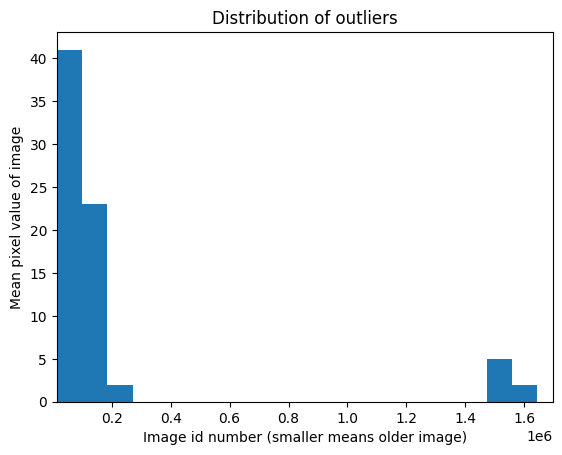

In [63]:
bins = np.linspace(math.ceil(min(test4)), 
                   math.floor(max(test4)),
                   20) # fixed number of bins

plt.xlim([min(test4), 1697558])

plt.hist(test4, bins=bins)
plt.title('Distribution of outliers')
plt.xlabel('Image number (smaller means older image)')
plt.ylabel('Amount of images')

plt.show()

In [25]:
image_names = list()
for image in test4:

    image_name = (image[:-7])
    image_names.append(image_name)

relevant_image_names = np.load("/Users/olath/Documents/GitHub/Master-thesis/Data_Experimentation/images_with_paths_file_2.npy",allow_pickle='TRUE').item()

match_counter = 0

for key in relevant_image_names:

    if key in image_names:

        #print('Match!')
        match_counter += 1

print(match_counter)

45


In [149]:
for subdir, dirs, files in os.walk('/Volumes/Extreme SSD/ADNI_PROCESSED/'):

    counter = 0

    for file in files:
     
        if (not file.startswith('._')):

            counter += 1

            img_nifti = nib.load('/Volumes/Extreme SSD/ADNI_PROCESSED/'+file)

            img = np.array(img_nifti.dataobj)

            if img.min() == 0:

                print('Found zero in image:', file)

Found zero in image: 135611.nii.gz
Found zero in image: 436463.nii.gz
